In [1]:
from collection import Vector
import matplotlib.pyplot as plt
from numpy import random as rnd
import numpy as np
from time import sleep
from PIL import Image
from IPython.display import HTML, IFrame
import matplotlib.image as mpimg

In [2]:
%run core.ipynb

In [3]:
## Imports

In [4]:
IImport('caminho')

Importado Caminho: <class 'type'> de caminho


In [5]:
Cardeais = {
    'N':Vector.up(),
    'S':Vector.down(),
    'L':Vector.right(),
    'O':Vector.left()
}
Colaterais = {
    'NO': Cardeais['N'] + Cardeais['O'],
    'SO': Cardeais['S'] + Cardeais['O'],
    'NE': Cardeais['N'] + Cardeais['L'],
    'SE': Cardeais['S'] + Cardeais['L']
}

Direções = Cardeais.copy()
Direções.update(Colaterais)
Direções

{'N': [0, 1],
 'S': [0, -1],
 'L': [1, 0],
 'O': [-1, 0],
 'NO': [-1, 1],
 'SO': [-1, -1],
 'NE': [1, 1],
 'SE': [1, -1]}

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/2a/Rosa_dos_Ventos_dsfdfdsdsaljdl.jpg/800px-Rosa_dos_Ventos_dsfdfdsdsaljdl.jpg" alt="Pontos Cardeais" width="100px"/>

In [6]:
class Mapa:
    Tipos = {
        'Rota': 0,
        'Parede': 1
    }
    def __init__(self, size):
        self.map = []
        self.size = Vector(*size)
        for cl in range(size[1]):
            coluna = []
            for ln in range(size[0]):
                if hasattr(Mapa.Tipos['Rota'], 'copy'):
                    coluna.append(Mapa.Tipos['Rota'].copy())
                else:
                    coluna.append(Mapa.Tipos['Rota'])
            self.map.append(coluna)
    
    def toimg(self, colors: dict=None):
        if colors is None:
            colors={0:(0,0,0),1:(255,255,255)}
        img = Image.new('RGB', self.size)
        for x in range(self.size[0]):
            for y in range(self.size[1]):
                pos = (x, y)
                img.putpixel(pos, colors[self[pos]])
        return img
    
    def __getitem__(self, item):
        return self.map[item[1]][item[0]]
    
    def __setitem__(self, item, value):
        if value in Mapa.Tipos.keys():
            self.map[item[1]][item[0]] = Mapa.Tipos[value]
        else:
            self.map[item[1]][item[0]] = value
    
    def dentro(self, posição):
        if not(0 <= posição[0] < self.size[0]):
            return False
        if not(0 <= posição[1] < self.size[1]):
            return False
        return True
    def show(self):
        im = mz.toimg()
        plt.imshow(im, interpolation='nearest')
        
    def detalhar(self):
        im = mz.toimg()
        lum_img = np.asarray(im)[:,:,0]
        fig = plt.figure(figsize=(10,10))
        a = fig.add_subplot(1, 2, 1)
        imgplot = plt.imshow(lum_img)
        # a.invert_yaxis()
        a.set_title('Mapa de Calor')
        # plt.colorbar(ticks=[0.1, 0.3, 0.5, 0.7], orientation='horizontal')
        b = fig.add_subplot(1, 2, 2)
        imgplot = plt.imshow(im)
        # b.invert_yaxis()
        b.set_title('Original')
        # plt.colorbar()
        plt.imshow(im, interpolation='nearest')
        
    def preencher(self, valor):
        for x in range(self.size[0]):
            for y in range(self.size[1]):
                self[x,y]=valor
    def __repr__(self):
        tab = '  '
        sep = '  '
        res = ''
        res += tab + 'y\\\u0332x '
        for i in range(self.size[0]):
            res += f'\u0332{str(i)}'
            res += '__'[:len(str(i))]
        res += '\n'+ tab + ' |' + '\n'
        for lin in range(self.size[1]):
            linha = tab
            linha += str(lin) + '|'+tab
            for col in range(self.size[0]):
                linha+=str(self.map[lin][col])+sep
            res += linha +'\n'
        return f'<Mapa:\n{res}>'


In [7]:
def gerar_labirinto(*tamanho, putvalor=None, possoir_func=None, logger=None):
    if putvalor is None:
        putvalor = Mapa.Tipos['Rota']
    if possoir_func is None:
        possoir_func = lambda x: x!=putvalor
    maze = Mapa(tamanho)
    maze.preencher('Parede')
    rota = Caminho(Vector(0,0))
    
    def posso_ir(minha_posição, direção):
        direita_relativa = Vector(direção[1], direção[0])
        esquerda_relativa = -direita_relativa
        frente_relativa = direção
        testar = [
            frente_relativa,
            frente_relativa + direita_relativa,
            frente_relativa + esquerda_relativa,
            direita_relativa,
            esquerda_relativa
        ]
        nova_posição = minha_posição+direção
        
        if not maze.dentro(nova_posição):
            return False
        if not possoir_func(maze[nova_posição]):
            return False
        
        for direção_relativa in testar:
            posição_teste = nova_posição+direção_relativa
            if maze.dentro(posição_teste):
                if not possoir_func(maze[posição_teste]):
                    return False
        # Aprovado!
        return True
    
    def get_opções(minha_posição):
        ops = []
        for direção in Cardeais.values():
            if posso_ir(minha_posição, direção):
                ops.append(minha_posição + direção)
        if logger is not None:
            logger.append(('Olhei', ops))
        return ops
    
    def escolher(ops):
        return ops[rnd.randint(0, len(ops))]
    
    n =0
    while True:
        print(f'n={n}', end='\r')
        n+=1
        maze[rota.data]=putvalor
        if logger is not None:
            logger.append(('Pintei', rota.data))
        opções = get_opções(rota.data)
#         print('Posição',rota.data)
#         print('Opções:',opções)
#         sleep(5)
        if not opções:
            
            rota = rota.anterior
            if rota is None:
                # Fim
                break
            else:
                if logger is not None:
                    logger.append(('Voltei', [rota.proximo.data, rota.data]))
                rota.setfim()
                
        else:
            escolha = escolher(opções)
            if logger is not None:
                logger.append(('Escolhi', escolha.copy()))
            rota.adicionar(escolha)
            rota = rota.proximo
                
    return maze

In [8]:
logger = []
mz = gerar_labirinto(30, 30,logger=logger)

In [9]:
len(logger)

2732

In [10]:
def animação_geração(mz, lg):
    img = Image.new('RGB', mz.size)
    frames = [img]
    colors = {
        'Escolhi': (255,0,0),
        'Voltei': (0,255,255),
        'Pintei': (255,255,0),
        'Olhei': (0,0,100),
    }
    for tipo, valor in lg:
        frames.append(frames[-1].copy())
        if tipo == 'Escolhi':
            frames[-1].putpixel(valor, colors[tipo])
        elif tipo == 'Pintei':
            frames[-1].putpixel(valor, colors[tipo])
        elif tipo == 'Voltei':
            frames[-1].putpixel(valor[0], colors[tipo])
        elif tipo == 'Olhei':
            for v in valor:
                frames[-1].putpixel(v, colors[tipo])
    return frames    

In [11]:
frames = animação_geração(mz, logger)

In [12]:
frames[-1].save('animation.gif', format='GIF', append_images=frames[1:],
         save_all=True, duration=20, loop=0)

In [22]:
HTML('<style>.mz-gen{width: 350px;image-rendering: pixelated;}</style>')

In [23]:
HTML('<img class="mz-gen" src="animation.gif">')

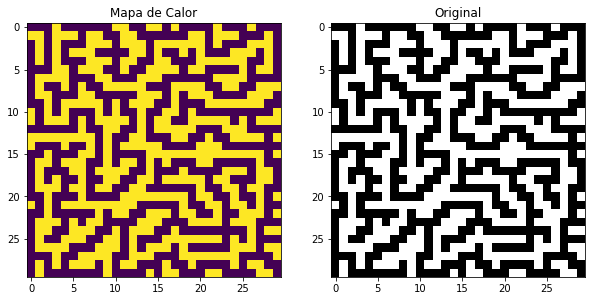

In [14]:
mz.detalhar()